8_neda_mimfpt_(ML_Log_Reg)_

Engin Abdan

### Libraries

In [35]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D 
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D 

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport

import pickle

from scipy.stats import skew
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.style.use('classic')

### Data

In [36]:
stu = pd.read_excel("std_ins_ml_data.xlsx")

In [37]:
stu.head(1)

,Unnamed: 0,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean,MI_Cat
0,0,20,19,10,16,13,16,17,22,1,95,Intrap


In [38]:
drop_list = ["Unnamed: 0", "Flight_Mean", "MI_Cat"]
stu.drop(drop_list, inplace=True, axis=1)
stu.head(1)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not
0,20,19,10,16,13,16,17,22,1


### Data infos

In [39]:
stu.describe().T

,count,mean,std,min,25%,50%,75%,max
Ling_Int,100.000,17.720,3.069,11.000,16.000,17.000,20.000,26.000
Math_Int,100.000,17.750,3.655,10.000,15.000,17.000,19.000,33.000
Spa_Int,100.000,17.810,3.047,10.000,15.750,17.500,20.000,26.000
Mus_Int,100.000,17.860,3.111,10.000,16.000,17.500,20.000,26.000
Nat_Int,100.000,18.160,3.741,10.000,15.750,18.000,20.000,33.000
Body_Int,100.000,17.200,2.670,10.000,15.000,17.000,19.000,23.000
Interp_Int,100.000,17.780,2.866,12.000,16.000,18.000,19.000,26.000
Intrap_Int,100.000,18.070,2.875,13.000,16.000,18.000,20.000,26.000
Plt_Or_Not,100.000,0.580,0.496,0.000,0.000,1.000,1.000,1.000


### Data Balance

In [40]:
stu["Plt_Or_Not"].value_counts()

1    58
0    42
Name: Plt_Or_Not, dtype: int64

### Skewness

In [41]:
x = stu.drop(columns=["Plt_Or_Not"]).columns
for i in x:
    if skew(stu[i]) >= -0.5 and skew(stu[i]) < 0.5:
        print(f"{i} \t: {skew(stu[i])} \t>>> Normal")
    elif skew(stu[i]) >= 0.5 and skew(stu[i]) < 1.0:
        print(f"{i} \t: {skew(stu[i])} \t>>> Moderate")
    elif skew(stu[i]) >= 1.0:
        print(f"{i} \t: {skew(stu[i])} \t>>> Skewed")              

Ling_Int 	: 0.12059345356069898 	>>> Normal
Math_Int 	: 1.3051123209475743 	>>> Skewed
Spa_Int 	: 0.2115483275849964 	>>> Normal
Mus_Int 	: 0.32126133203604673 	>>> Normal
Nat_Int 	: 0.8025455431140828 	>>> Moderate
Body_Int 	: 0.16184329645515394 	>>> Normal
Interp_Int 	: 0.22759596608919014 	>>> Normal
Intrap_Int 	: 0.12173869243645632 	>>> Normal


### Heatmap

In [42]:
# plt.figure(figsize=(20,10))
# sns.heatmap(stu.corr(), annot=True, cmap="BrBG")
# plt.tight_layout();

### Pairplot

In [43]:
#sns.pairplot(stu,hue="Plt_Or_Not");

### Corr With Plt_Or_Not

<AxesSubplot:>

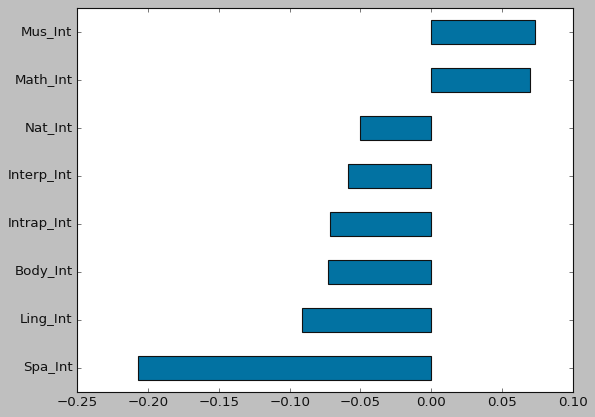

In [44]:
stu.corr()["Plt_Or_Not"].drop("Plt_Or_Not").sort_values().plot.barh()

### Train Test Split

In [45]:
x = stu.drop(columns=["Plt_Or_Not"], axis=1)
y = stu["Plt_Or_Not"]

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print("Train features shape : ", x_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", x_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (70, 8)
Train target shape   :  (70,)
Test features shape  :  (30, 8)
Test target shape    :  (30,)


### Scaling

In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Model

In [48]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train_scaled, y_train)

LogisticRegression()

In [49]:
y_test_pred = log_model.predict(x_test_scaled)
y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [50]:
y_test_pred_proba = log_model.predict_proba(x_test_scaled)
y_test_pred_proba

array([[0.28909959, 0.71090041],
       [0.47885044, 0.52114956],
       [0.35368666, 0.64631334],
       [0.30100113, 0.69899887],
       [0.38432228, 0.61567772],
       [0.26966618, 0.73033382],
       [0.29609535, 0.70390465],
       [0.35853712, 0.64146288],
       [0.31166752, 0.68833248],
       [0.29055223, 0.70944777],
       [0.35595142, 0.64404858],
       [0.32650459, 0.67349541],
       [0.41625266, 0.58374734],
       [0.282535  , 0.717465  ],
       [0.54441444, 0.45558556],
       [0.31652644, 0.68347356],
       [0.52561996, 0.47438004],
       [0.48848179, 0.51151821],
       [0.38369177, 0.61630823],
       [0.43306051, 0.56693949],
       [0.39001559, 0.60998441],
       [0.32396718, 0.67603282],
       [0.3514278 , 0.6485722 ],
       [0.30221303, 0.69778697],
       [0.35030785, 0.64969215],
       [0.32982462, 0.67017538],
       [0.30040656, 0.69959344],
       [0.40421074, 0.59578926],
       [0.34269764, 0.65730236],
       [0.28197337, 0.71802663]])

In [51]:
test_data = pd.concat([x_test, y_test], axis=1)
test_data["pred_proba"] = y_test_pred_proba[:,1]
test_data["pred1"] = y_test_pred
test_data.sample(10)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,pred_proba,pred1
40,17,18,17,18,18,14,15,17,1,0.700,1
10,12,17,14,16,23,14,18,18,1,0.688,1
53,17,13,18,13,13,22,23,20,1,0.521,1
15,21,21,17,17,16,17,17,17,1,0.670,1
30,21,19,19,15,26,14,19,17,0,0.673,1
80,26,19,19,23,18,17,21,16,0,0.641,1
18,18,18,22,18,20,14,16,17,0,0.644,1
69,19,17,15,18,20,22,19,14,1,0.650,1
55,23,20,17,20,22,21,19,19,0,0.610,1
26,16,17,17,15,17,16,16,20,0,0.649,1


In [52]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[ 1 15]
 [ 1 13]]
              precision    recall  f1-score   support

           0       0.50      0.06      0.11        16
           1       0.46      0.93      0.62        14

    accuracy                           0.47        30
   macro avg       0.48      0.50      0.37        30
weighted avg       0.48      0.47      0.35        30



### Cross Validate

In [53]:
from sklearn.model_selection import cross_validate

model = LogisticRegression()

scores = cross_validate(model,
                        x_train_scaled,
                        y_train,
                        scoring = ['accuracy',
                                   'precision',
                                   'recall',
                                   'f1',
                                   'roc_auc'],
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.614
test_precision   0.621
test_recall      0.975
test_f1          0.757
test_roc_auc     0.435
dtype: float64

### LogisticRegression & GridSearchCV 

In [735]:
log_model = LogisticRegression(max_iter=10000)

penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)

param_grid = {"penalty" : penalty,
             "l1_ratio" : l1_ratio,
             "C" : C}

In [736]:
grid_model = GridSearchCV(log_model, param_grid = param_grid)

<IPython.core.display.Javascript object>

In [737]:
grid_model.fit(x_train_scaled, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [738]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l2'}

In [739]:
y_pred = grid_model.predict(x_test_scaled)

In [740]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 1 15]
 [ 1 13]]
              precision    recall  f1-score   support

           0       0.50      0.06      0.11        16
           1       0.46      0.93      0.62        14

    accuracy                           0.47        30
   macro avg       0.48      0.50      0.37        30
weighted avg       0.48      0.47      0.35        30



### ROC / AUC --- Precision / Recall

In [741]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, precision_recall_curve, average_precision_score

In [742]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(C=1, l1_ratio=0, penalty="l2")
log_model.fit(x_train_scaled, y_train)

LogisticRegression(C=1, l1_ratio=0)

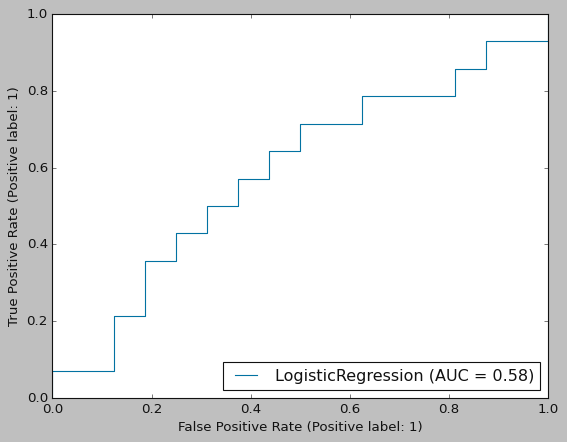

In [743]:
plot_roc_curve(log_model, x_test_scaled, y_test);

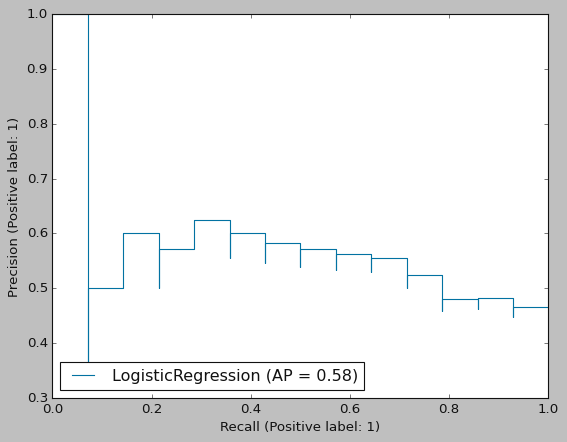

In [744]:
plot_precision_recall_curve(log_model, x_test_scaled, y_test);

### Finding Best Threshold

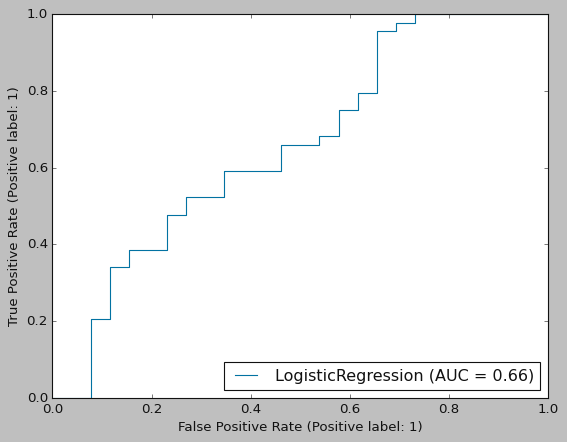

In [745]:
plot_roc_curve(log_model, x_train_scaled, y_train);

In [746]:
y_train_pred_proba = log_model.predict_proba(x_train_scaled)
roc_auc_score(y_train, y_train_pred_proba[:,1])

fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_pred_proba[:,1])

optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
optimal_threshold_rac

0.5787553054886606

In [747]:
test_data["pred2"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold_rac else 0)
test_data.head()

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,pred_proba,pred1,pred2
83,22,19,13,18,21,18,15,19,1,0.711,1,1
53,17,13,18,13,13,22,23,20,1,0.521,1,0
70,21,16,16,16,19,18,18,20,1,0.646,1,1
45,14,14,15,26,20,13,20,14,1,0.699,1,1
44,16,17,16,17,21,19,18,20,0,0.616,1,1


In [748]:
y_pred2 = test_data["pred2"]
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[ 3 13]
 [ 2 12]]
              precision    recall  f1-score   support

           0       0.60      0.19      0.29        16
           1       0.48      0.86      0.62        14

    accuracy                           0.50        30
   macro avg       0.54      0.52      0.45        30
weighted avg       0.54      0.50      0.44        30



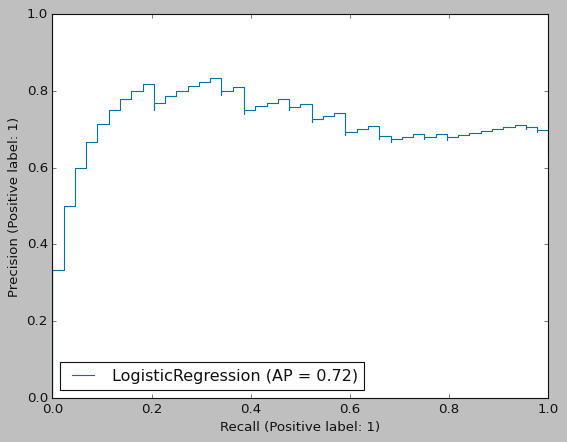

In [749]:
plot_precision_recall_curve(log_model, x_train_scaled, y_train);

In [750]:
y_train_pred_proba = log_model.predict_proba(x_train_scaled)
average_precision_score(y_train, y_train_pred_proba[:,1])

precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred_proba[:,1])

optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold_prc = thresholds[optimal_idx]
optimal_threshold_prc

0.7227169272108322

In [751]:
test_data["pred3"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold_prc else 0)
test_data.head()

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,pred_proba,pred1,pred2,pred3
83,22,19,13,18,21,18,15,19,1,0.711,1,1,0
53,17,13,18,13,13,22,23,20,1,0.521,1,0,0
70,21,16,16,16,19,18,18,20,1,0.646,1,1,0
45,14,14,15,26,20,13,20,14,1,0.699,1,1,0
44,16,17,16,17,21,19,18,20,0,0.616,1,1,0


In [752]:
y_pred3 = test_data["pred3"]
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[16  0]
 [13  1]]
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        16
           1       1.00      0.07      0.13        14

    accuracy                           0.57        30
   macro avg       0.78      0.54      0.42        30
weighted avg       0.76      0.57      0.44        30



### Prediction

In [753]:
import pickle

In [754]:
scaler = MinMaxScaler().fit(x)

In [755]:
pickle.dump(scaler, open("scaler_stu", 'wb'))

In [756]:
x_scaled = scaler.transform(x)

In [757]:
final_model = LogisticRegression().fit(x_scaled, y)

In [758]:
pickle.dump(final_model, open("final_model_stu", 'wb'))

In [759]:
columns_name = x.columns

In [760]:
pred = [[35, 36, 34, 37, 15, 17, 19, 21]]
pred_data = pd.DataFrame(data=pred, columns=columns_name)
pred_data

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int
0,35,36,34,37,15,17,19,21


In [761]:
scaler_stu = pickle.load(open("scaler_stu", "rb"))

In [762]:
pred_data_scaled = scaler_stu.transform(pred_data)
pred_data_scaled

array([[1.6       , 1.13043478, 1.5       , 1.6875    , 0.2173913 ,
        0.53846154, 0.5       , 0.61538462]])

In [763]:
final_model = pickle.load(open("final_model_stu", "rb"))

In [764]:
print("optimal_threshold_rac:", optimal_threshold_rac)
print()
print("optimal_threshold_prc:", optimal_threshold_prc)

optimal_threshold_rac: 0.5787553054886606

optimal_threshold_prc: 0.7227169272108322


In [765]:
predictions1 = final_model.predict(pred_data_scaled)
predictions_proba = final_model.predict_proba(pred_data_scaled)
predictions2 = [1 if i >= optimal_threshold_prc else 0 for i in predictions_proba[:,1]]
print(predictions_proba[0])
print(predictions_proba[0][0])
print(predictions_proba[0][1])

[0.66648183 0.33351817]
0.6664818257526968
0.3335181742473032


In [766]:
pred_data["pred_proba"] = predictions_proba[:,1]
pred_data["pred1"] = predictions1
pred_data["pred2"] = predictions2
pred_data

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,pred_proba,pred1,pred2
0,35,36,34,37,15,17,19,21,0.334,0,0


In [769]:
columns_name = x.columns
MI_Cat = columns_name[np.argmax(pred_data)]
MI_Score = max(pred[0])
Best_Threshold = optimal_threshold_prc

if predictions_proba[:,1] >= Best_Threshold:
    print(f"MI_Cat\t\t\t: {MI_Cat}\nMI_Score\t\t: {MI_Score}\nBest_Threshold\t\t: {Best_Threshold}\nPredictions_Proba\t: {predictions_proba[0][1]}\nPrediction\t\t: 1\nResult\t\t\t: Pilot")
if predictions_proba[:,1] < Best_Threshold:
    print(f"MI_Cat\t\t\t: {MI_Cat}\nMI_Score\t\t: {MI_Score}\nBest_Threshold\t\t: {Best_Threshold}\nPredictions_Proba\t: {predictions_proba[0][1]}\nPrediction\t\t: 0\nResult\t\t\t: Not Pilot")

MI_Cat			: Mus_Int
MI_Score		: 37
Best_Threshold		: 0.7227169272108322
Predictions_Proba	: 0.3335181742473032
Prediction		: 0
Result			: Not Pilot
